In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete, gamma

from base import OutbreakRiskModel

In [2]:
rng = np.random.default_rng(0)

In [3]:
period = 360
unvaccinated_reproduction_no_mean = 3
unvaccinated_reproduction_no_prop_variation = 0.25
peak_transmission_time = 0

generation_time_max = 30
generation_time_vals = np.arange(1, generation_time_max + 1)
generation_time_probs = gamma.pdf(generation_time_vals, a=3, scale=5 / 3)
generation_time_probs /= generation_time_probs.sum()
generation_time_dist = rv_discrete(values=(generation_time_vals, generation_time_probs))

dispersion_param = 0.41

In [4]:
antibody_model_params_pop = {
    "mrna_dose": 100,
    "mrna_decay_rate": np.log(2),
    "delay_to_antibody_response": 4.1,
    "max_antibody_production_rate": 6472.4,
    "mrna_response_steepness": 0.0163,
    "half_maximal_response_mrna": 28100,
    "antibody_decay_rate": 0.875,
}
antibody_model_params_random_effects = {key: 0 for key in antibody_model_params_pop}
susceptibility_func_params = {
    "antibody_response_steepness": 3 / np.log(10),
    "half_protection_antibody": 114.92 * np.exp(0.2 * np.log(10)),
}

period = 360
vaccination_time_range = [0, 90]
proportion_vaccinated = 0.8
population_size = 1
rng_seed = 0

In [5]:
model = OutbreakRiskModel(
    period=period,
    unvaccinated_reproduction_no_mean=unvaccinated_reproduction_no_mean,
    unvaccinated_reproduction_no_prop_variation=unvaccinated_reproduction_no_prop_variation,
    peak_transmission_time=peak_transmission_time,
    generation_time_dist=generation_time_dist,
    dispersion_param=dispersion_param,
    vaccination_time_range=vaccination_time_range,
    proportion_vaccinated=proportion_vaccinated,
    antibody_model_params_pop=antibody_model_params_pop,
    antibody_model_params_random_effects=antibody_model_params_random_effects,
    susceptibility_func_params=susceptibility_func_params,
    population_size=population_size,
    rng=rng,
)

In [6]:
time_vec = np.arange(2 * period)
unvaccinated_reproduction_no_vec = model.unvaccinated_reproduction_no(time_vec)
reproduction_no_vec = model.reproduction_no(time_vec)
susceptibility_vec = model.susceptibility(time_vec)

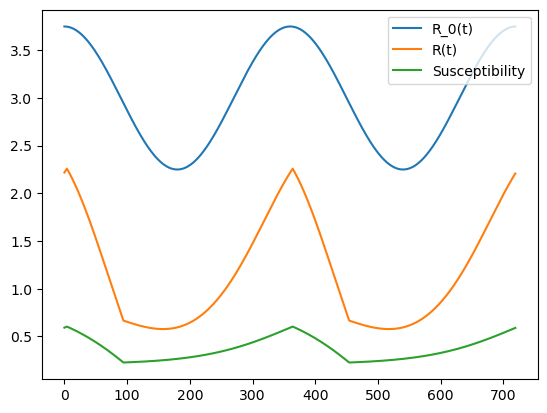

In [7]:
plt.plot(time_vec, unvaccinated_reproduction_no_vec, label="R_0(t)")
plt.plot(time_vec, reproduction_no_vec, label="R(t)")
plt.plot(time_vec, susceptibility_vec, label="Susceptibility")
plt.legend()

In [8]:
cor_vec = model.case_outbreak_risk(time_vec)
ior_vec = model.instantaneous_outbreak_risk(time_vec)

/Users/user/Documents/Git_repos/covid-boosters/base.py:422: RuntimeWarning: invalid value encountered in power
  - (


In [9]:
time_vec_sim = np.arange(2 * period, step=30)
sor_vec = model.simulated_outbreak_risk(
    time_vec_sim, incidence_cutoff=1000000, no_simulations=100, rng=rng
)

(0.0, 1.0)

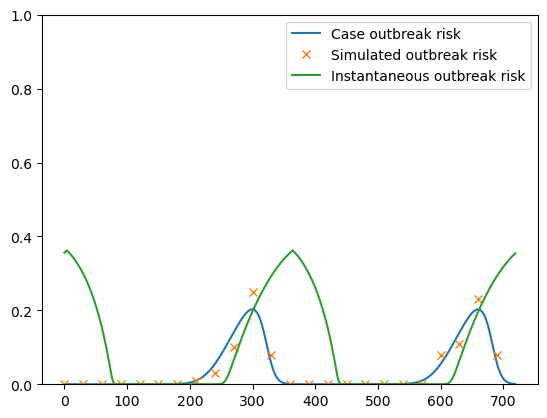

In [10]:
plt.plot(time_vec, cor_vec, label="Case outbreak risk")
plt.plot(time_vec_sim, sor_vec, "x", label="Simulated outbreak risk")
plt.plot(time_vec, ior_vec, label="Instantaneous outbreak risk")
plt.legend()
plt.ylim(0, 1)